In [1]:
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
#Child age range 0-10, Teen age range 11-17
#All data reflected is killed by gun incident
child = pd.read_csv('children.csv')
teen = pd.read_csv('teen.csv')

In [3]:
child.rename(columns={'# Killed': 'children-killed', '# Injured': 'children-injured'}, inplace=True)
teen.rename(columns={'# Killed': 'teen-killed', '# Injured': 'teen-injured'}, inplace=True)

In [4]:
child.drop(['Incident ID', 'Incident Date','City Or County','Operations','Address'], axis = 1, inplace = True) 
teen.drop(['Incident ID', 'Incident Date','City Or County','Operations','Address'], axis = 1, inplace = True) 

In [5]:
grp_child = child.groupby(['State'])['children-killed','children-injured'].sum()
grp_teen = teen.groupby(['State'])['teen-killed','teen-injured'].sum()

/Users/brittanieocampo/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/Users/brittanieocampo/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [6]:
#Texas has highest incidents 
df = pd.concat([grp_child, grp_teen],axis=1)
df

,children-killed,children-injured,teen-killed,teen-injured
State,,,,
Alabama,76.0,13.0,72.0,19.0
Alaska,31.0,0.0,9.0,0.0
Arizona,73.0,12.0,52.0,18.0
Arkansas,57.0,5.0,31.0,2.0
California,159.0,47.0,148.0,41.0
Colorado,51.0,0.0,48.0,22.0
Connecticut,32.0,2.0,14.0,1.0
Delaware,5.0,0.0,4.0,3.0
District of Columbia,7.0,9.0,21.0,7.0


In [11]:
#Years: 2014 - Dec 2022, updates on a weekly basis. 
df.replace(np.nan, 0, inplace = True)
df.sort_values(by=['children-killed'], ascending=False)

,children-killed,children-injured,teen-killed,teen-injured
State,,,,
Texas,375.0,71.0,271.0,43.0
Florida,202.0,37.0,130.0,33.0
California,159.0,47.0,148.0,41.0
Missouri,150.0,25.0,63.0,15.0
Ohio,148.0,36.0,106.0,29.0
Georgia,137.0,16.0,131.0,44.0
South Carolina,126.0,21.0,71.0,17.0
North Carolina,117.0,27.0,121.0,38.0
Michigan,115.0,19.0,64.0,22.0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaled_data1 = scaler.fit_transform(df.iloc[: , 1:])

In [17]:
pca1 = PCA(n_components=0.50)
pca_transformed_data1 = pca1.fit_transform(scaled_data1)
pca1.explained_variance_ratio_.sum()

0.9173407332198712

In [18]:
tsne1 = TSNE(learning_rate=100)
transformed_features1 = tsne1.fit_transform(pca_transformed_data1)

df['x'] = transformed_features1[:,0]
df['y'] = transformed_features1[:,1]
# df['class'] = df['State']

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


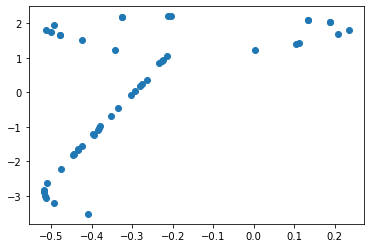

In [19]:
plt.scatter(df["x"], df["y"])
plt.show()

In [20]:
inertia1 = []
k = list(range(1, 15))

# Calculate the inertia for the range of k values
for i in k:
    km1 = KMeans(n_clusters=i, random_state=0)
    km1.fit(scaled_data1)
    inertia1.append(km1.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data1 = {"k": k, "inertia": inertia1}
df_elbow1 = pd.DataFrame(elbow_data1)
df_elbow1.head()

c:\Users\tinph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,k,inertia
0,1,153.000000
1,2,55.513037
2,3,31.040620
3,4,16.143508
4,5,11.723817


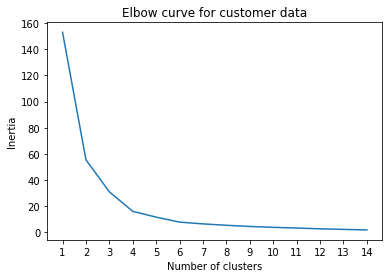

In [21]:
plt.plot(df_elbow1['k'], df_elbow1['inertia'])
plt.xticks(range(1,15))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()